In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Дата          301355 non-null  object
 1   Склад         301355 non-null  int64 
 2   Контрагент    301355 non-null  object
 3   Номенклатура  301355 non-null  object
 4   Количество    301355 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB


Сразу переведем столбец "Дата" в правильный формат

In [73]:
df['Дата'] = pd.to_datetime(df['Дата'])

Сгруппируйте данные по дате, посчитайте количество продаж

In [29]:
grouped_df =df.groupby('Дата')['Количество'].sum()

In [79]:
grouped_df.head()

Дата
2018-01-04    3734
2018-01-05    3643
2018-01-06    3193
2018-01-07    3298
2018-01-09    4055
Name: Количество, dtype: int64

Вывести несколько первых строк сгруппированных данных

Нарисуйте график продаж у `grouped_df`

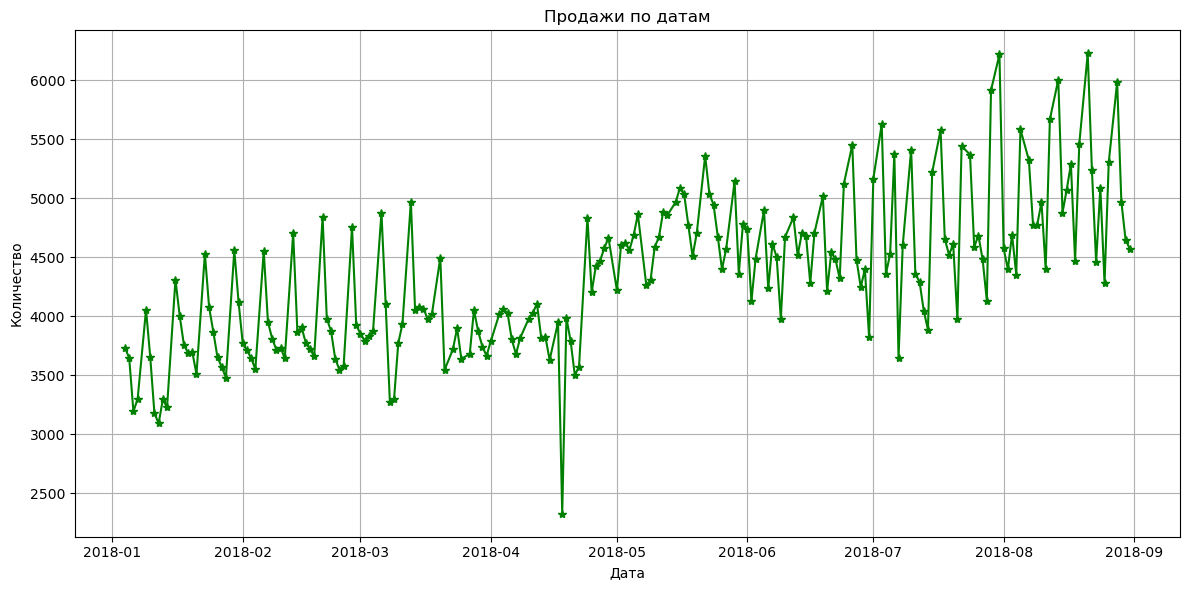

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(grouped_df, marker='*',color='green')
plt.title('Продажи по датам')
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.grid(True)
plt.tight_layout()
plt.show()


Опишите что вы видите на графике. Ваша задача - максимально описать график

In [ ]:
График показывает количество продаж по дням за период с 01-01-2018 по 31-08-2018.
Общий тренд- восходящий, так как в целом продажи растут вверх. Видны сезонные и недельные калебания, так как продажи понижаются и повышаются регулярно.
вероятнее всего в определенные дни спрос на товар выше чем в другие дни. есть аномалии- резкое падение в апреле (вероятно всего сбой в системе или выходной день)
так же присутствует резкое увеличение в августе.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [44]:
Q1 = df['Количество'].quantile(0.25)
Q3 = df['Количество'].quantile(0.75)
IQR = Q3 - Q1

# Границы выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Фильтруем выбросы
outliers = df[(df['Количество'] < lower_bound) | (df['Количество'] > upper_bound)]

# Получаем строку с максимальным отклонением от верхней границы
if len(outliers) > 0:
    max_outlier_row = outliers.loc[outliers['Количество'].idxmax()]
    print(max_outlier_row)
else:
    print("Выбросов не найдено")

Дата            2018-06-28 00:00:00
Склад                             1
Контрагент              address_208
Номенклатура              product_0
Количество                      200
Name: 218822, dtype: object


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [49]:
# Добавим столбцы с названием дня недели и число месяца
df['День_недели'] = df['Дата'].dt.day_name(locale='Russian')  # названия на русском
df['Месяц'] = df['Дата'].dt.month    

In [56]:
df_среда = df[df['День_недели'] == 'Среда']
df_среда_склад3=df_среда[df_среда['Склад']==3]
df_среда_склад3_июнь=df_среда_склад3[df_среда_склад3['Месяц']==6]
топовый_товар_среда_июнь_3склад=df_среда_склад3_июнь.groupby('Номенклатура')['Количество'].sum()
index_топовый_товар_среда_июнь_3склад=топовый_товар_среда_июнь_3склад.idxmax()
count_топовый_товар_среда_июнь_3склад=топовый_товар_среда_июнь_3склад.max()
print(f"Топовый товар по продажам по средам за июнь у 3 склада: {index_топовый_товар_среда_июнь_3склад}, количество продаж:{count_топовый_товар_среда_июнь_3склад}")


df_среда = df[df['День_недели'] == 'Среда']
df_среда_склад3=df_среда[df_среда['Склад']==3]
df_среда_склад3_июль=df_среда_склад3[df_среда_склад3['Месяц']==7]
топовый_товар_среда_июль_3склад=df_среда_склад3_июль.groupby('Номенклатура')['Количество'].sum()
index_топовый_товар_среда_июль_3склад=топовый_товар_среда_июль_3склад.idxmax()
count_топовый_товар_среда_июль_3склад=топовый_товар_среда_июль_3склад.max()
print(f"Топовый товар по продажам по средам за июль у 3 склада: {index_топовый_товар_среда_июль_3склад}, количество продаж:{count_топовый_товар_среда_июль_3склад}")

df_среда = df[df['День_недели'] == 'Среда']
df_среда_склад3=df_среда[df_среда['Склад']==3]
df_среда_склад3_август=df_среда_склад3[df_среда_склад3['Месяц']==8]
топовый_товар_среда_август_3склад=df_среда_склад3_август.groupby('Номенклатура')['Количество'].sum()
index_топовый_товар_среда_август_3склад=топовый_товар_среда_август_3склад.idxmax()
count_топовый_товар_среда_август_3склад=топовый_товар_среда_август_3склад.max()
print(f"Топовый товар по продажам по средам за август у 3 склада: {index_топовый_товар_среда_август_3склад}, количество продаж:{count_топовый_товар_среда_август_3склад}")

Топовый товар по продажам по средам за июнь у 3 склада: product_1, количество продаж:616
Топовый товар по продажам по средам за июль у 3 склада: product_1, количество продаж:696
Топовый товар по продажам по средам за август у 3 склада: product_1, количество продаж:955


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [81]:
df_2= pd.read_csv('Погода_2.csv', encoding='cp1251')
df_2['Дата'] = pd.to_datetime(df_2['Дата'])
merged = pd.merge(grouped_df, df_2, on='Дата', how='left')
merged.head()

,Дата,Количество,Температура
0,2018-01-04,3734,-14
1,2018-01-05,3643,-17
2,2018-01-06,3193,-13
3,2018-01-07,3298,-13
4,2018-01-09,4055,-6
